In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
directory="C:/workspaces/AnjutkaVideo"
video_filename="V5__R_20180915_211343"
input_filename=video_filename+"_drifts15.csv"
input_filepath=directory+"/"+input_filename

#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V1_R_20180911_165259_drifts14.csv",delimiter="\t",na_values="(null)") #
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V1_R_20180911_165259_drifts12.csv",delimiter="\t",na_values="(null)") #244 errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V2_R_20180911_165730_drifts12.csv",delimiter="\t",na_values="(null)") #4 errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V3_R_20180911_170159_drifts14.csv",delimiter="\t",na_values="(null)") #no errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V3_R_20180916_012323_drifts12.csv",delimiter="\t",na_values="(null)") #no errors left
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V6__R_20180915_212238_drifts11.csv",delimiter="\t",na_values="(null)") #11 errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V5__R_20180915_211343_drifts11.csv",delimiter="\t",na_values="(null)") # 24 errors
data = pd.read_csv(input_filepath,delimiter="\t",na_values="(null)") # 24 errors

#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V4__R_20180915_210447_drifts11.csv",delimiter="\t",na_values="(null)") # no errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V3__R_20180915_205551_drifts11.csv",delimiter="\t",na_values="(null)") #13 errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V3__R_20180915_205551_drifts15.csv",delimiter="\t",na_values="(null)")


In [3]:
#data.head(30)

In [4]:
#data.dtypes
data['driftY_orig']=data['driftY']

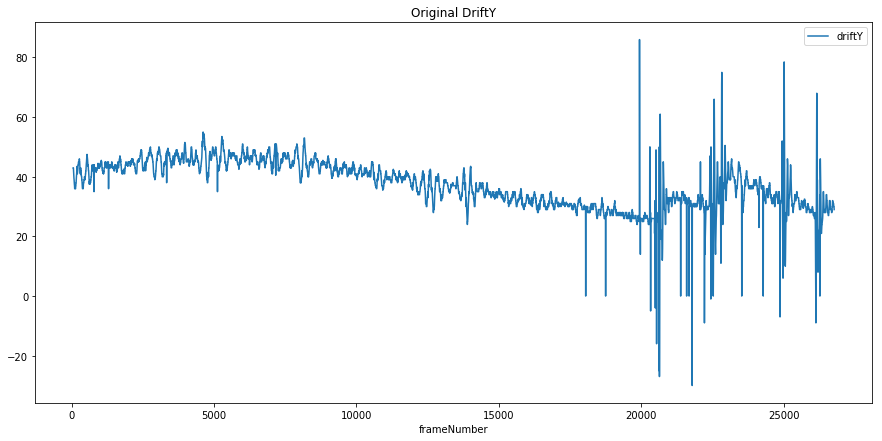

In [5]:
data.plot(x='frameNumber', y='driftY',figsize=(15,7), title="Original DriftY")

In [6]:
data.loc[data['driftY'] < -30].count()[0]

0

In [7]:
#Correct "single outliers" (where prev and next data points are not outliers)
def replaceOutlierBetweenTwo():
    prevY=data['driftY'].shift(periods=1)
    nextY=data['driftY'].shift(periods=-1)
    diffNextPrevY=abs(prevY - nextY)
    meanY=(nextY+prevY)/2
    deviationY = abs(data['driftY']-meanY)
    single_outlier = (deviationY >30) & (diffNextPrevY <30)
    data['driftY'] = data['driftY'].mask(single_outlier, meanY)

In [8]:
#data.loc[data['driftY'] != data['driftY_orig']].head(10) 

0

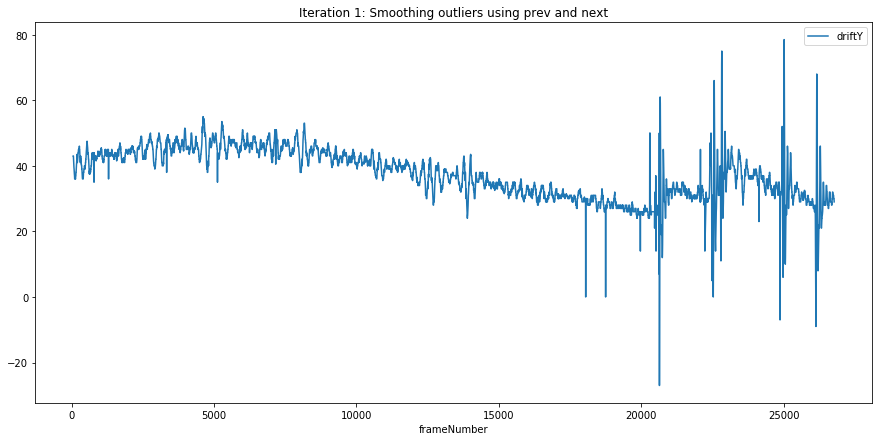

In [9]:
replaceOutlierBetweenTwo()
#data.loc[data['frameNumber'] > 4900].loc[data['frameNumber'] < 5860].plot(kind='bar', x='frameNumber', y='driftY_corrected',figsize=(15,7))
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 1: Smoothing outliers using prev and next")
data.loc[data['driftY'] < -30].count()[0]

In [10]:
#data.loc[data['single_outlier'] == True]

#data['driftY_corrected'] = data['driftY']
def replaceIfThirdIsOutlier():
    
    outlierThreshold = 70
    normalJump = 10
    
    prevPrevY=data['driftY'].shift(periods=2)
    nextNextY=data['driftY'].shift(periods=-2)
    prevY=data['driftY'].shift(periods=1)
    nextY=data['driftY'].shift(periods=-1)

    meanY=(prevPrevY + prevY)/2
    deviationY = abs(data['driftY']-meanY)

    diffPrevsY=prevY-prevPrevY

    outlier_fromPrevs = (deviationY > outlierThreshold) & (abs(diffPrevsY) < normalJump)
    data['driftY'] = data['driftY'].mask(outlier_fromPrevs, prevY+diffPrevsY)

In [11]:
replaceIfThirdIsOutlier()

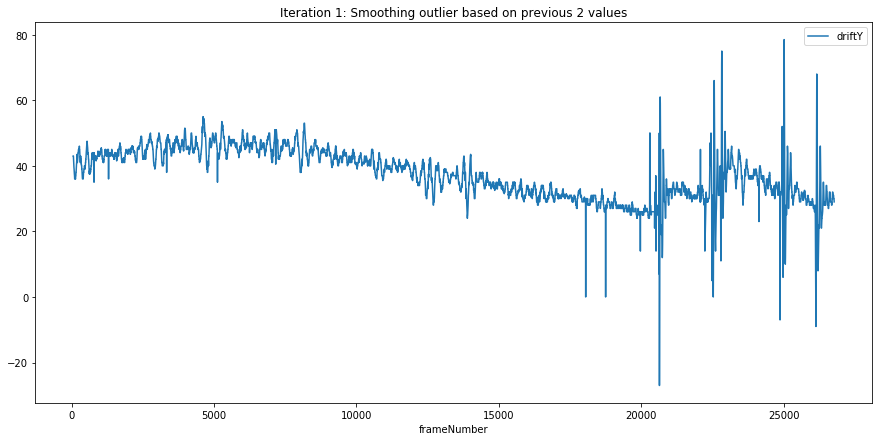

In [12]:
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title ="Iteration 1: Smoothing outlier based on previous 2 values")

In [13]:
data.loc[data['driftY'] < -30].count()[0]

0

0

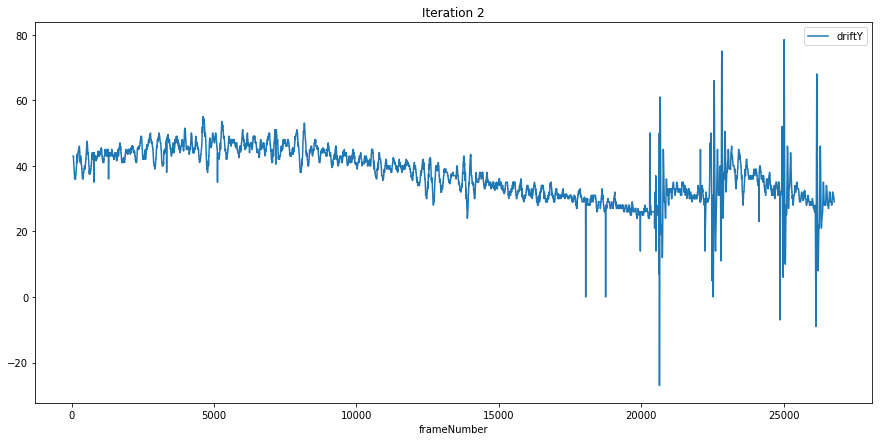

In [14]:
replaceOutlierBetweenTwo()
replaceIfThirdIsOutlier()
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title ="Iteration 2")
data.loc[data['driftY'] < -30].count()[0]

0

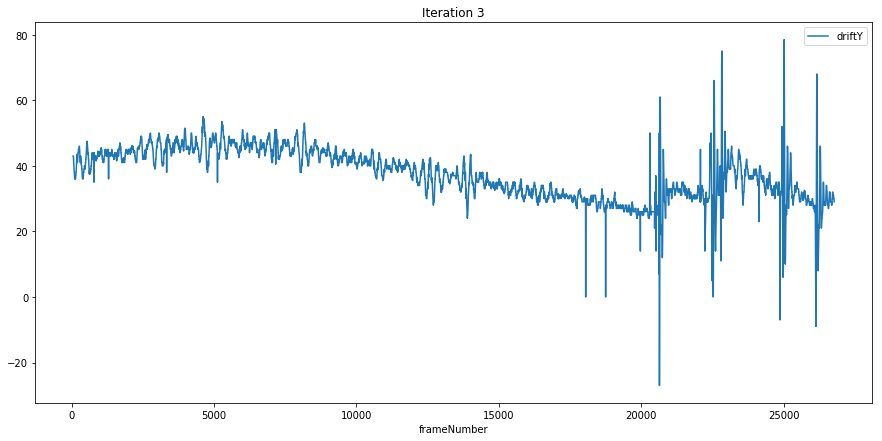

In [15]:
replaceOutlierBetweenTwo()
replaceIfThirdIsOutlier()
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title ="Iteration 3")
data.loc[data['driftY'] < -30].count()[0]

0

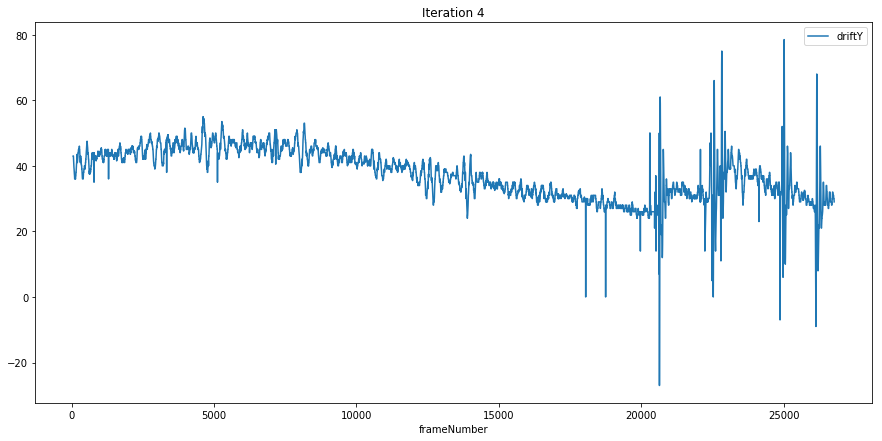

In [16]:
replaceOutlierBetweenTwo()
replaceIfThirdIsOutlier()
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 4")
data.loc[data['driftY'] < -30].count()[0]

0

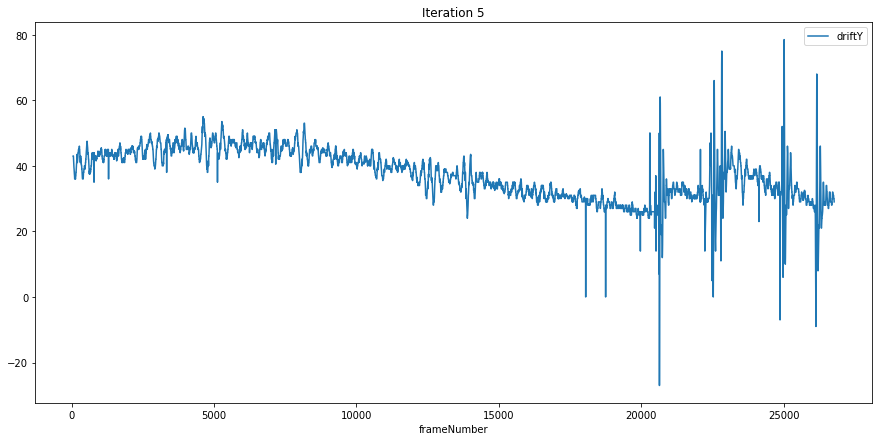

In [17]:
replaceOutlierBetweenTwo()
replaceIfThirdIsOutlier()
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 5")
data.loc[data['driftY'] < -30].count()[0]

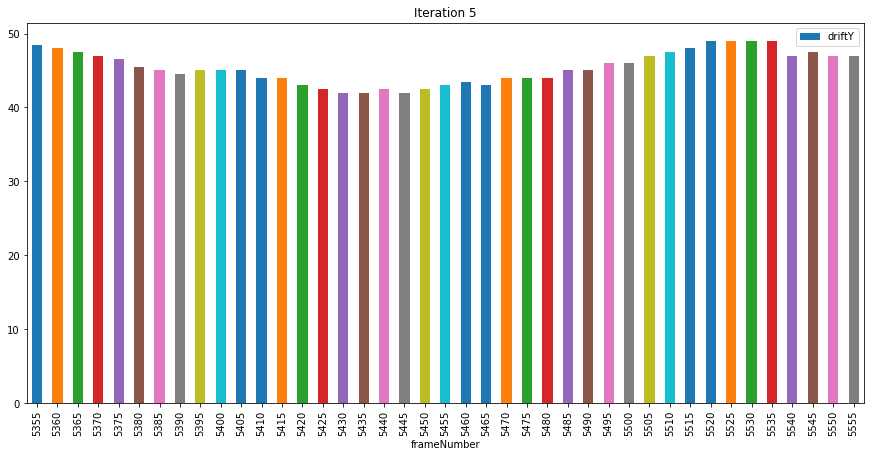

In [18]:
data.loc[data['frameNumber'] > 5350].loc[data['frameNumber'] < 5560].plot(kind="bar", x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 5")

In [19]:
data.loc[data['frameNumber'] > 5350].loc[data['frameNumber'] < 5460].head(100)

,frameNumber,driftX,driftY,driftDistance,driftAngle,driftsCount,drifts,driftsNoOutliers,outlier,driftY_orig
1060,5355,-6.0,48.5,48.881086,-81.869898,6,"['(-7,48)', '(-8,49)', '(-8,49)', '(-2,48)', '...","['(-7,48)', '(-8,49)', '(-8,49)', '(-2,48)', '...",NaN,48.5
1061,5360,-5.0,48.0,48.373546,-83.267396,8,"['(-6,48)', '(-6,48)', '(-6,49)', '(-7,49)', '...","['(-6,48)', '(-6,48)', '(-6,49)', '(-7,49)', '...",NaN,48.0
1062,5365,-4.5,47.5,47.877489,-82.874984,8,"['(-6,47)', '(-6,48)', '(-6,49)', '(-7,48)', '...","['(-6,47)', '(-6,48)', '(-6,49)', '(-7,48)', '...",NaN,47.5
1063,5370,-7.0,47.0,47.518417,-81.869898,7,"['(-7,46)', '(-7,47)', '(-7,49)', '(-8,47)', '...","['(-7,46)', '(-7,47)', '(-7,49)', '(-8,47)', '...",NaN,47.0
1064,5375,-6.5,46.5,46.973465,-81.203788,8,"['(-8,45)', '(-8,47)', '(-8,49)', '(-9,47)', '...","['(-8,45)', '(-8,47)', '(-8,49)', '(-9,47)', '...",NaN,46.5
1065,5380,-5.5,45.5,46.035375,-81.869898,8,"['(-7,45)', '(-7,46)', '(-7,48)', '(-8,46)', '...","['(-7,45)', '(-7,46)', '(-7,48)', '(-8,46)', '...",NaN,45.5
1066,5385,-3.0,45.0,45.398238,-82.874984,7,"['(-6,45)', '(-5,47)', '(-7,45)', '(1,44)', '(...","['(-6,45)', '(-5,47)', '(-7,45)', '(1,44)', '(...",NaN,45.0
1067,5390,-4.5,44.5,44.974198,-82.372441,6,"['(-6,44)', '(-6,47)', '(-7,45)', '(0,44)', '(...","['(-6,44)', '(-6,47)', '(-7,45)', '(0,44)', '(...",NaN,44.5
1068,5395,-5.0,45.0,45.363462,-82.372441,6,"['(-7,44)', '(-6,46)', '(-7,44)', '(-4,46)', '...","['(-7,44)', '(-6,46)', '(-7,44)', '(-4,46)', '...",NaN,45.0
1069,5400,-4.0,45.0,45.044423,-81.869898,7,"['(-7,43)', '(-7,46)', '(-8,43)', '(-2,45)', '...","['(-7,43)', '(-7,46)', '(-8,43)', '(-2,45)', '...",NaN,45.0


In [24]:
output_filename=video_filename+"_toCut.csv"
output_filepath=directory+"/output/"+output_filename
print(output_filepath)

C:/workspaces/AnjutkaVideo//output/V5__R_20180915_211343_toCut.csv


In [25]:
data.to_csv(output_filepath, sep='\t')